## IMPORT NECESSARY PACKAGES

## Using Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## STEP 1:  LOAD DATASET

In [2]:
# Step 1: Load the dataset
df = pd.read_csv('creditcard-Copy1.csv')  # Replace with your dataset file


In [3]:
#Check the sample:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 2: Data Preprocessing

In [4]:
#Summary of the variables
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [5]:
#Check if there are missing values. We can see all the values are zero. This indicates that no variables has missing value

print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Assuming 'Class' is the target column where 1 indicates fraud and 0 indicates non-fraud

# Separate features and target
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target



### CHECK FOR CORRELATION

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
round(X.corr(),5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.00000,0.11740,-0.01059,-0.41962,-0.10526,0.17307,-0.06302,0.08471,-0.03695,-0.00866,...,-0.05087,0.04474,0.14406,0.05114,-0.01618,-0.23308,-0.04141,-0.00513,-0.00941,-0.01060
V1,0.11740,1.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.22771
V2,-0.01059,0.00000,1.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,...,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.53141
V3,-0.41962,-0.00000,0.00000,1.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.21088
V4,-0.10526,-0.00000,-0.00000,0.00000,1.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.09873
V5,0.17307,0.00000,0.00000,-0.00000,-0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.38636
V6,-0.06302,-0.00000,0.00000,0.00000,-0.00000,0.00000,1.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.21598
V7,0.08471,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.39731
V8,-0.03695,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.10308
V9,-0.00866,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.04425


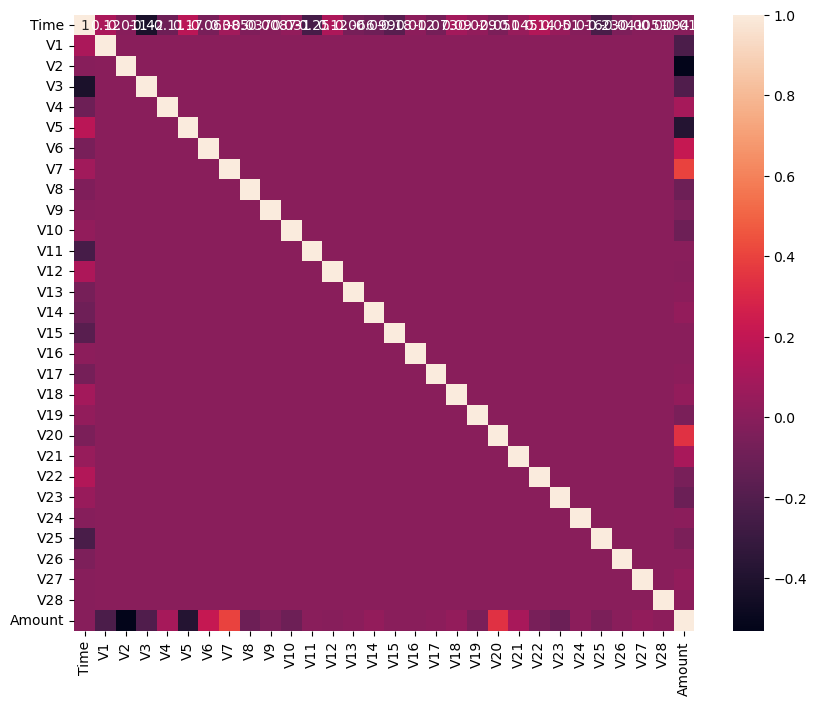

In [9]:
import seaborn as sns  #data visualization library

plt.figure(figsize = (10, 8))
sns.heatmap(X.corr(), annot = True);

### Check for multicollinearity

In [10]:
# Step 4: Check for multicollinearity using Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)



Variance Inflation Factor (VIF):
   Features        VIF
0      Time   2.339084
1        V1   1.621694
2        V2   3.869377
3        V3   1.255585
4        V4   1.137944
5        V5   2.753075
6        V6   1.522122
7        V7   2.510165
8        V8   1.097151
9        V9   1.018831
10      V10   1.115668
11      V11   1.028861
12      V12   1.011961
13      V13   1.003434
14      V14   1.026832
15      V15   1.014135
16      V16   1.000371
17      V17   1.004772
18      V18   1.006568
19      V19   1.037809
20      V20   2.233934
21      V21   1.100720
22      V22   1.082384
23      V23   1.149268
24      V24   1.000659
25      V25   1.013388
26      V26   1.000487
27      V27   1.008979
28      V28   1.001425
29   Amount  11.499791


#### Amount has high VIF > 5 which indicate the presence of multicollinearity. Let's analyze including "Amount" and compare the 
#### result with when "Amount" is excluded

In [11]:
# Split the data into training and testing sets with 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [12]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Train the Model


In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [14]:
# Step 4: Make Predictions
y_pred = model.predict(X_test)

In [15]:
# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.00
Precision: 0.83
Recall: 0.63
F1 Score: 0.72
Confusion Matrix:
[[56851    13]
 [   36    62]]


##### An accuracy of 1.00 (or 100%) indicates that the model correctly classified every instance in the dataset.
##### Despite the high accuracy, accuracy alone can be misleading, especially if the classes are imbalanced. This is why we need to look at precision, recall, and the F1 score.

##### A precision of 0.83 means that 83% of the instances that the model predicted as positive were actually positive.

##### A recall of 0.63 means that the model only correctly identified 63% of the actual positive instances.
##### This lower recall suggests that the model missed a significant number of actual positive cases, meaning it has a relatively high number of false negatives.

##### An F1 score of 0.72 indicates a balance between precision and recall, but also highlights that the model is not perfect in either metric.
##### Since F1 score balances precision and recall, it’s particularly useful when we have an uneven class distribution or when the cost of false positives and false negatives are different.

## Let us exclude "Amount" variable

In [19]:
# Assuming 'Class' is the target column where 1 indicates fraud and 0 indicates non-fraud

# Separate features and target
X = df.drop(['Amount', 'Class'], axis=1)




In [20]:
print(X.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V19       V20       V21       V22       V23  \
0  0.098698  0.363787  ...  0.403993  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425  ... -0.145783 -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  ... -2.261857  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024  ... -1.232622 -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  ...  0.803487  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26 

In [21]:
round(X.corr(),5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Time,1.00000,0.1174,-0.01059,-0.41962,-0.10526,0.17307,-0.06302,0.08471,-0.03695,-0.00866,...,0.02898,-0.05087,0.04474,0.14406,0.05114,-0.01618,-0.23308,-0.04141,-0.00513,-0.00941
V1,0.11740,1.0000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,...,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
V2,-0.01059,0.0000,1.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,...,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000
V3,-0.41962,-0.0000,0.00000,1.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,...,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000
V4,-0.10526,-0.0000,-0.00000,0.00000,1.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,...,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000
V5,0.17307,0.0000,0.00000,-0.00000,-0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000
V6,-0.06302,-0.0000,0.00000,0.00000,-0.00000,0.00000,1.00000,0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000
V7,0.08471,-0.0000,0.00000,0.00000,-0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,...,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000
V8,-0.03695,-0.0000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,1.00000,0.00000,...,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000
V9,-0.00866,-0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000


In [22]:
# Step 4: Check for multicollinearity using Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif)



Variance Inflation Factor (VIF):
   Features       VIF
0      Time  1.103579
1        V1  1.003050
2        V2  1.000025
3        V3  1.038970
4        V4  1.002452
5        V5  1.006629
6        V6  1.000879
7        V7  1.001588
8        V8  1.000302
9        V9  1.000017
10      V10  1.000207
11      V11  1.013578
12      V12  1.003422
13      V13  1.000961
14      V14  1.002159
15      V15  1.007449
16      V16  1.000031
17      V17  1.001189
18      V18  1.001810
19      V19  1.000186
20      V20  1.000573
21      V21  1.000443
22      V22  1.004593
23      V23  1.000579
24      V24  1.000058
25      V25  1.012024
26      V26  1.000379
27      V27  1.000006
28      V28  1.000020


#### All variables have VIF < 5

In [23]:
# Split the data into training and testing sets with 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [24]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [26]:
# Step 4: Make Predictions
y_pred = model.predict(X_test)

In [27]:
# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.00
Precision: 0.83
Recall: 0.63
F1 Score: 0.72
Confusion Matrix:
[[56851    13]
 [   36    62]]


#### Compared to previous result, we see that there is no difference in the result if "Amount" is included in the analysis

In [28]:
# Now y_pred contains the predicted values and y_test contains the actual values
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [0 0 0 ... 0 0 0]
Actual values: [0 0 0 ... 0 0 0]


## Using Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train the Model with Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 1.00
Precision: 0.96
Recall: 0.74
F1 Score: 0.84
Confusion Matrix:
[[56861     3]
 [   25    73]]


## Neural Network

In [33]:
#pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (Neural networks often perform better with standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [35]:
from tensorflow.keras.layers import Dense, Dropout

# Build the Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Make Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Neural Network Accuracy: {accuracy:.2f}')
print(f'Neural Network Precision: {precision:.2f}')
print(f'Neural Network Recall: {recall:.2f}')
print(f'Neural Network F1 Score: {f1:.2f}')
print(f'Neural Network Confusion Matrix:\n{conf_matrix}')

Epoch 1/20
7121/7121 [==============================] - 79s 10ms/step - loss: 0.0116 - accuracy: 0.9982 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 2/20
7121/7121 [==============================] - 67s 9ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 3/20
7121/7121 [==============================] - 60s 8ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 4/20
7121/7121 [==============================] - 66s 9ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 5/20
7121/7121 [==============================] - 62s 9ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 6/20
7121/7121 [==============================] - 74s 10ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 7/20
7121/7121 [==============================] - 73s 10ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0033 - val